In [1]:
import pandas as pd
import datetime
import numpy as np

### importing data and basic data representation

In [2]:
order_data = pd.read_excel('order data.xlsx')

In [3]:
order_data.shape

(39940, 4)

In [4]:
order_data.head()

,id,userId,total,created
0,194,330,4760,2017-03-01 14:22:30
1,201,142,10395,2017-03-01 16:41:53
2,208,324,10395,2017-03-01 21:51:09
3,215,258,4165,2017-03-02 08:22:00
4,222,232,2940,2017-03-02 11:51:57


### We have total 39940 data points with 4 variables

## Our Data Have 4 columns:
id: id is the order id

userId: userId is the Id of the user who placed the order

total: the amount of order the user placed

created: Date and time of order placed

## Creating a function which will take the created data and return a group value 
#### Group Value - Date if the Date is monday else Date of upcoming monday

In [5]:
def next_weekday(d):
    '''
    Convert Order Date to a Order Group, Represented by Year-Month-Date Format where
    Date is the same date if the input date is monday 
    else the date is next monday date of provided date.
    '''
    day_of_week = d.weekday()
    if day_of_week !=0:
        d = d + datetime.timedelta(7 - day_of_week)
        
    return d.strftime('%Y-%m-%d')

# Creating Cohort Group
### Grouping customers who placed there first order in same week 

In [6]:
order_data.set_index('userId', inplace=True)

In [7]:
order_data['CohortGroup'] = order_data.groupby(level =0)['created'].min().apply(next_weekday)

### Now we have a new column name CohortGroup which holds the group name of each order

In [8]:
order_data.head()

,id,total,created,CohortGroup
userId,,,,
330,194,4760,2017-03-01 14:22:30,2017-03-06
142,201,10395,2017-03-01 16:41:53,2017-03-06
324,208,10395,2017-03-01 21:51:09,2017-03-06
258,215,4165,2017-03-02 08:22:00,2017-03-06
232,222,2940,2017-03-02 11:51:57,2017-03-06


In [9]:
order_data.reset_index(inplace=True)

In [10]:
order_data.head()

,userId,id,total,created,CohortGroup
0,330,194,4760,2017-03-01 14:22:30,2017-03-06
1,142,201,10395,2017-03-01 16:41:53,2017-03-06
2,324,208,10395,2017-03-01 21:51:09,2017-03-06
3,258,215,4165,2017-03-02 08:22:00,2017-03-06
4,232,222,2940,2017-03-02 11:51:57,2017-03-06


### Adding another column name OrderPeriod which holds the group name when the order placed

In [11]:
order_data['OrderPeriod'] = order_data.created.apply(next_weekday)

#### We made two columns from 'created' column. CohortGroup holds the week date when the customer placed the order and OrderPeriod holds the week date whenever the customer placed the order

In [12]:
order_data.head()

,userId,id,total,created,CohortGroup,OrderPeriod
0,330,194,4760,2017-03-01 14:22:30,2017-03-06,2017-03-06
1,142,201,10395,2017-03-01 16:41:53,2017-03-06,2017-03-06
2,324,208,10395,2017-03-01 21:51:09,2017-03-06,2017-03-06
3,258,215,4165,2017-03-02 08:22:00,2017-03-06,2017-03-06
4,232,222,2940,2017-03-02 11:51:57,2017-03-06,2017-03-06


### grouping data by CohortGroup then by OrderPeriod and count unique counts

In [13]:
grouped = order_data.groupby(['CohortGroup', 'OrderPeriod']).agg({'userId': pd.Series.nunique})

In [14]:
grouped

userId
CohortGroup OrderPeriod        
2017-03-06  2017-03-06       26
            2017-03-13        9
            2017-03-20        3
            2017-03-27        7
            2017-04-03        6
            2017-04-10        9
            2017-04-17        8
            2017-04-24        9
            2017-05-01        9
            2017-05-08        8
            2017-05-15        4
            2017-05-22        6
            2017-05-29        4
            2017-06-05       10
            2017-06-12        6
            2017-06-19        8
            2017-06-26        7
            2017-07-03        8
            2017-07-10        8
            2017-07-17        4
            2017-07-24        6
            2017-07-31        7
            2017-08-07        3
            2017-08-14        2
            2017-08-21        2
            2017-08-28        3
            2017-09-04        7
            2017-09-11        7
            2017-09-18        8
            2017-09-25        6
...                         ...
2018-01-22  2018-03-05       22
            2018-03-12       11
2018-01-29  2018-01-29      432
            2018-02-05       91
            2018-02-12       74
            2018-02-19       63
            2018-02-26       67
            2018-03-05       48
            2018-03-12       18
2018-02-05  2018-02-05      639
            2018-02-12      125
            2018-02-19      104
            2018-02-26      101
            2018-03-05       89
            2018-03-12       29
2018-02-12  2018-02-12      551
            2018-02-19      121
            2018-02-26       93
            2018-03-05       76
            2018-03-12       27
2018-02-19  2018-02-19      631
            2018-02-26      125
            2018-03-05      101
            2018-03-12       47
2018-02-26  2018-02-26      643
            2018-03-05      128
            2018-03-12       44
2018-03-05  2018-03-05      598
            2018-03-12       42
2018-03-12  2018-03-12      216

[1454 rows x 1 columns]

In [15]:
def cohort_period(df):
    '''
    Takes a dataframe 
    sort dataframe by sub -group 
    creates a new column with index (for future purpose)
    '''
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [16]:
retention = grouped.groupby(level=0).apply(cohort_period)

In [17]:
retention

userId  CohortPeriod
CohortGroup OrderPeriod                      
2017-03-06  2017-03-06       26             0
            2017-03-13        9             1
            2017-03-20        3             2
            2017-03-27        7             3
            2017-04-03        6             4
            2017-04-10        9             5
            2017-04-17        8             6
            2017-04-24        9             7
            2017-05-01        9             8
            2017-05-08        8             9
            2017-05-15        4            10
            2017-05-22        6            11
            2017-05-29        4            12
            2017-06-05       10            13
            2017-06-12        6            14
            2017-06-19        8            15
            2017-06-26        7            16
            2017-07-03        8            17
            2017-07-10        8            18
            2017-07-17        4            19
            2017-07-24        6            20
            2017-07-31        7            21
            2017-08-07        3            22
            2017-08-14        2            23
            2017-08-21        2            24
            2017-08-28        3            25
            2017-09-04        7            26
            2017-09-11        7            27
            2017-09-18        8            28
            2017-09-25        6            29
...                         ...           ...
2018-01-22  2018-03-05       22             6
            2018-03-12       11             7
2018-01-29  2018-01-29      432             0
            2018-02-05       91             1
            2018-02-12       74             2
            2018-02-19       63             3
            2018-02-26       67             4
            2018-03-05       48             5
            2018-03-12       18             6
2018-02-05  2018-02-05      639             0
            2018-02-12      125             1
            2018-02-19      104             2
            2018-02-26      101             3
            2018-03-05       89             4
            2018-03-12       29             5
2018-02-12  2018-02-12      551             0
            2018-02-19      121             1
            2018-02-26       93             2
            2018-03-05       76             3
            2018-03-12       27             4
2018-02-19  2018-02-19      631             0
            2018-02-26      125             1
            2018-03-05      101             2
            2018-03-12       47             3
2018-02-26  2018-02-26      643             0
            2018-03-05      128             1
            2018-03-12       44             2
2018-03-05  2018-03-05      598             0
            2018-03-12       42             1
2018-03-12  2018-03-12      216             0

[1454 rows x 2 columns]

In [18]:
retention.reset_index(inplace=True)

In [19]:
retention.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

### Unstaking data to get a data frame where columns: CohortPeriod and index: CohortGroup

In [20]:
unstacked = retention['userId'].unstack(1)

In [21]:
unstacked.head(10)

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2017-03-06,26.0,9.0,3.0,7.0,6.0,9.0,8.0,9.0,9.0,8.0,...,2.0,1.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0
2017-03-13,28.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0,4.0,5.0,...,1.0,5.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2017-03-20,25.0,7.0,3.0,4.0,5.0,6.0,3.0,6.0,7.0,2.0,...,3.0,1.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
2017-03-27,27.0,6.0,6.0,4.0,2.0,2.0,5.0,3.0,3.0,3.0,...,4.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-03,32.0,7.0,8.0,6.0,3.0,4.0,2.0,5.0,2.0,1.0,...,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-10,22.0,9.0,8.0,4.0,4.0,5.0,4.0,3.0,4.0,6.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-17,39.0,6.0,8.0,4.0,2.0,9.0,7.0,4.0,4.0,7.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-24,43.0,5.0,6.0,8.0,4.0,3.0,4.0,3.0,2.0,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,68.0,16.0,14.0,9.0,8.0,9.0,13.0,9.0,10.0,11.0,...,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We want to observe customer retention for next 10 weeks for each cohort group where the first week of order is Week 0

In [22]:
retention_10 = unstacked[[i for i in range(11)]]

In [23]:
retention_10.columns = [f'Week {i}' for i in retention_10.columns]

## Here is how our output looks like
#### Exporting our data

In [24]:
retention_10

,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10
CohortGroup,,,,,,,,,,,
2017-03-06,26.0,9.0,3.0,7.0,6.0,9.0,8.0,9.0,9.0,8.0,4.0
2017-03-13,28.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0,4.0,5.0,8.0
2017-03-20,25.0,7.0,3.0,4.0,5.0,6.0,3.0,6.0,7.0,2.0,4.0
2017-03-27,27.0,6.0,6.0,4.0,2.0,2.0,5.0,3.0,3.0,3.0,5.0
2017-04-03,32.0,7.0,8.0,6.0,3.0,4.0,2.0,5.0,2.0,1.0,3.0
2017-04-10,22.0,9.0,8.0,4.0,4.0,5.0,4.0,3.0,4.0,6.0,4.0
2017-04-17,39.0,6.0,8.0,4.0,2.0,9.0,7.0,4.0,4.0,7.0,2.0
2017-04-24,43.0,5.0,6.0,8.0,4.0,3.0,4.0,3.0,2.0,4.0,5.0
2017-05-01,68.0,16.0,14.0,9.0,8.0,9.0,13.0,9.0,10.0,11.0,8.0


In [25]:
retention_10.to_csv('retention.csv')

## Now for better visualization and understanding we will convert our data to percentage 
### Dividing Column Week 1 -10 by Week 0 (and keeping columns Week 1- 10) as Week 0 always will be 100%

In [26]:
retention_10_per = retention_10.iloc[:,1:].div(retention_10['Week 0'], axis=0)

In [27]:
retention_10_per

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10
CohortGroup,,,,,,,,,,
2017-03-06,0.346154,0.115385,0.269231,0.230769,0.346154,0.307692,0.346154,0.346154,0.307692,0.153846
2017-03-13,0.178571,0.071429,0.178571,0.178571,0.107143,0.107143,0.142857,0.142857,0.178571,0.285714
2017-03-20,0.280000,0.120000,0.160000,0.200000,0.240000,0.120000,0.240000,0.280000,0.080000,0.160000
2017-03-27,0.222222,0.222222,0.148148,0.074074,0.074074,0.185185,0.111111,0.111111,0.111111,0.185185
2017-04-03,0.218750,0.250000,0.187500,0.093750,0.125000,0.062500,0.156250,0.062500,0.031250,0.093750
2017-04-10,0.409091,0.363636,0.181818,0.181818,0.227273,0.181818,0.136364,0.181818,0.272727,0.181818
2017-04-17,0.153846,0.205128,0.102564,0.051282,0.230769,0.179487,0.102564,0.102564,0.179487,0.051282
2017-04-24,0.116279,0.139535,0.186047,0.093023,0.069767,0.093023,0.069767,0.046512,0.093023,0.116279
2017-05-01,0.235294,0.205882,0.132353,0.117647,0.132353,0.191176,0.132353,0.147059,0.161765,0.117647


### Let's make our data more explanatory by visualizing it

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import seaborn as sns

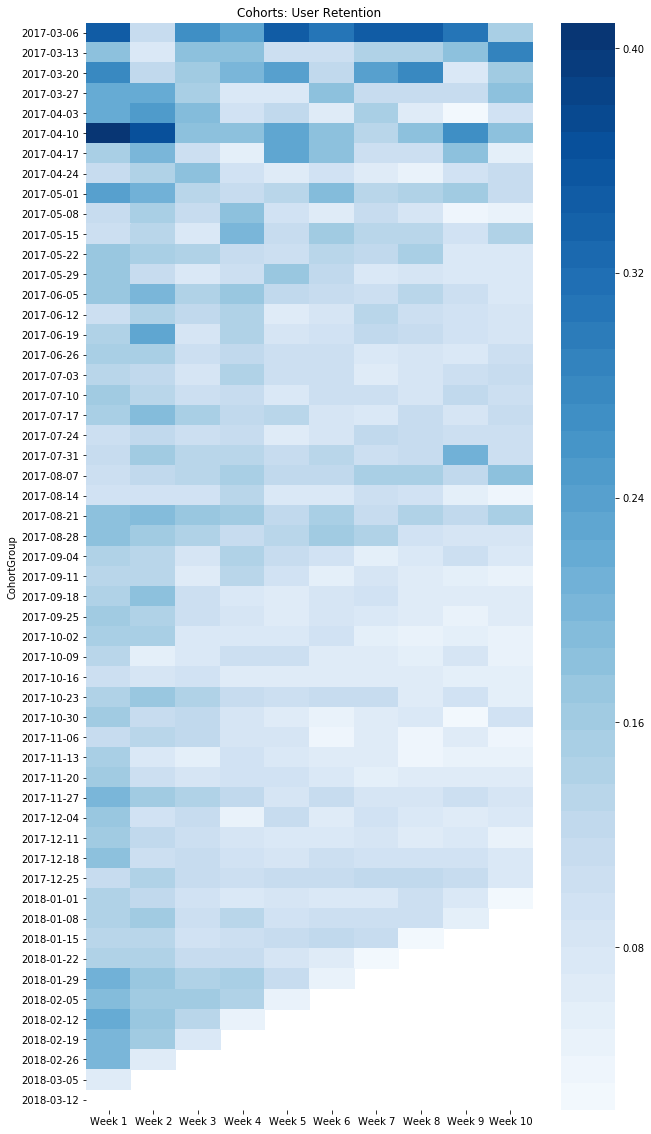

In [30]:
plt.figure(figsize=(10, 20))
plt.title('Cohorts: User Retention')
heat_map = sns.heatmap(retention_10_per, cmap=sns.color_palette('Blues', 40))
figure = heat_map.get_figure()    
figure.savefig('user retention.png', dpi=1000)